In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisle = pd.read_csv("F:/Capstone Project-20181124T090357Z-001/Capstone Project/Dataset/Data/aisles.csv")
dept = pd.read_csv("F:/Capstone Project-20181124T090357Z-001/Capstone Project/Dataset/Data/departments.csv")
order_prior = pd.read_csv("F:/Capstone Project-20181124T090357Z-001\Capstone Project/Dataset/Data/order_products_prior.csv")
order_train = pd.read_csv("F:/Capstone Project-20181124T090357Z-001/Capstone Project/Dataset/Data/order_products_train.csv")
order_test = pd.read_csv("F:/Capstone Project-20181124T090357Z-001/Capstone Project/Dataset/Data/order_products_test.csv")
orders = pd.read_csv("F:/Capstone Project-20181124T090357Z-001/Capstone Project/Dataset/Data/orders.csv")
products = pd.read_csv("F:/Capstone Project-20181124T090357Z-001/Capstone Project/Dataset/Data/products.csv")                   

In [3]:
#order_data = order_train.append(order_test, sort = True)
print("Aisle shape", aisle.shape)
print("dept shape", dept.shape)
print("order_prior", order_prior.shape)
print("order_train", order_train.shape)
print("order_test", order_test.shape)
print("orders", orders.shape)
print("Products", products.shape)

Aisle shape (134, 2)
dept shape (21, 2)
order_prior (32434489, 4)
order_train (1068168, 5)
order_test (316449, 5)
orders (1048575, 8)
Products (49688, 4)


In [4]:
orders.head()

,Unnamed: 0,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set,order_id
0,0,1,1,2,8,NaN,prior,2539329
1,1,1,2,3,7,15.0,prior,2398795
2,2,1,3,3,12,21.0,prior,473747
3,3,1,4,4,7,29.0,prior,2254736
4,4,1,5,4,15,28.0,prior,431534


In [5]:
l = orders.groupby('eval_set')["user_id"].apply(lambda x: len(x.unique()))
l = pd.DataFrame(l)
l = l.reset_index()
l.columns = ["eval_set","user_id"]
l.head()

,eval_set,user_id
0,prior,62764
1,test,48406
2,train,14358


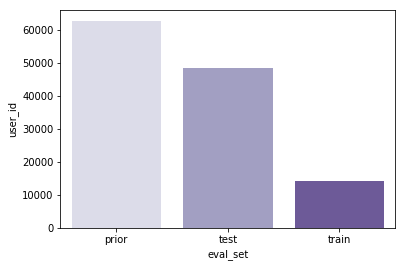

In [6]:
sns.barplot(l.eval_set, l.user_id, palette = "Purples")

In [7]:
#Number of unique customers in the whole dataset
len(set(orders.user_id))

62764

In [8]:
#Number of ordered made by each set
ordered = orders.groupby("eval_set")["order_id"].aggregate({'total_orders': 'count'})
ordered = pd.DataFrame(ordered)
ordered = ordered.reset_index()
ordered["ratio"] = ordered["total_orders"].apply(lambda x: x/ordered["total_orders"].sum())
ordered.columns = ["eval_set","total_orders","Ratio"]
ordered

C:\Users\erdib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,eval_set,total_orders,Ratio
0,prior,985811,0.940144
1,test,48406,0.046164
2,train,14358,0.013693


# Problem Statement: 
#1)	When do customers order the most?
-	Day of the week
-	Time of the day
-	Combination of the above two.

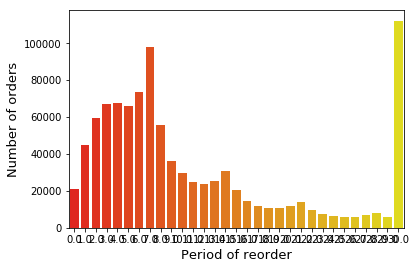

In [9]:
sns.countplot(x = "days_since_prior_order", data = orders, palette = "autumn")
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

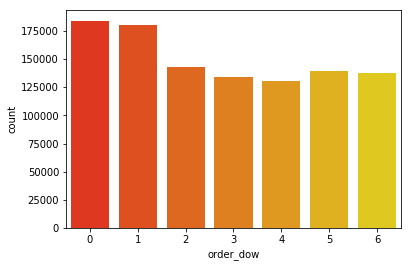

In [10]:
sns.countplot(x = "order_dow", data = orders, palette = "autumn")

According to the above graph it seems the customer ordered most in Sunday and Monday.

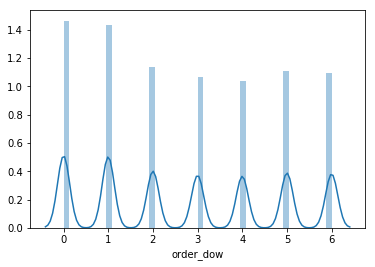

In [11]:
sns.distplot(orders["order_dow"])

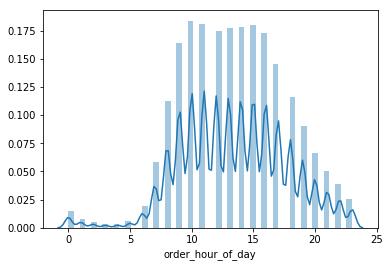

In [12]:
sns.distplot(orders["order_hour_of_day"])

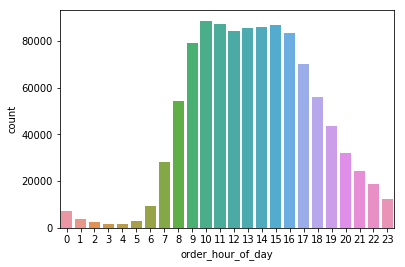

In [13]:
sns.countplot(x= "order_hour_of_day", data = orders)

According to the above graph customer ordered most from morning 9 to evening 8.

# 2)	What are the top 5 products?
-	That are ordered.
-	That are reordered.

In [14]:
order_prior_df = pd.merge(order_prior, products, on='product_id', how='left')
order_prior_df = pd.merge(order_prior_df, aisle, on='aisle_id', how='left')
order_products = pd.merge(order_prior_df, dept, on='department_id', how='left')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [15]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


The top 5 products which are ordered are given below.

In [16]:
l = order_products.groupby("product_name").product_id.count()
l = pd.DataFrame(l)
l = l.reset_index()
l.columns = ["product_name","product_count"]
l.head()

,product_name,product_count
0,#2 Coffee Filters,777
1,#2 Cone White Coffee Filters,13
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,241
4,& Go! Hazelnut Spread + Pretzel Sticks,164


In [17]:
l = l.sort_values(["product_count"], ascending = False)
l.head()

,product_name,product_count
3676,Banana,472565
3471,Bag of Organic Bananas,379450
31920,Organic Strawberries,264683
28840,Organic Baby Spinach,241921
30297,Organic Hass Avocado,213584


From the above table we can conclude that the top 5 products which are ordered the most are Bananas, Bag of Organic Bananas, Organic Strawberries, Organic baby Spinach and Large lemon

By loooking into above table we find that, people are more inclined towards organic products. 

In [18]:
order_products.shape

(32434489, 9)

Let's try to find how many products are reordered by customer again.

In [19]:
reordered = order_products.groupby("product_id")["reordered"].aggregate({'reorder_sum': sum,
                                                                           'reorder_total': 'count'}).reset_index()
reordered['reordered_probability'] = reordered['reorder_sum'] / reordered['reorder_total']
reordered = pd.merge(reordered, products[['product_id', 'product_name']], how='left', on=['product_id'])
reordered = reordered[reordered.reorder_total > 75].sort_values(['reordered_probability'], ascending=False)[:5]
reordered

C:\Users\erdib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,product_id,reorder_sum,reorder_total,reordered_probability,product_name
2074,2075,81,87,0.931034,Serenity Ultimate Extrema Overnight Pads
27734,27740,93,101,0.920792,Chocolate Love Bar
35598,35604,90,100,0.900000,Maca Buttercups
38243,38251,99,111,0.891892,Benchbreak Chardonnay
36794,36801,85,96,0.885417,Organic Blueberry B Mega


From the table we find that Organic Low Fat Milk, Organic Orange Juice With Calcium & Vitamin D, French Vanilla Soy Cream
er, Organic Lactose Free 1% Lowfat Milk and Banana are the top 5 reordered products.

# 3)	What is the reorder ratio for each department?

In [20]:
ratio = order_products.groupby("department")['order_id'].aggregate({"Total_orders":
                                                                     'count'}).reset_index()
ratio["Ratio"] = ratio["Total_orders"].apply(lambda x: x/ratio["Total_orders"].sum())

C:\Users\erdib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [21]:
ratio = ratio.sort_values("Total_orders", ascending = False)
ratio = pd.DataFrame(ratio)
ratio.head()

,department,Total_orders,Ratio
19,produce,9479291,0.292260
7,dairy eggs,5414016,0.166922
20,snacks,2887550,0.089027
3,beverages,2690129,0.082940
10,frozen,2236432,0.068952


In [22]:
ratio = order_products.groupby("department")['reordered'].aggregate({"reorder_sum": sum,"reorder_count" :"count"}).reset_index()
ratio["dept_reordered_ratio"] = ratio['reorder_sum'] / ratio['reorder_count']
ratio = ratio.sort_values("dept_reordered_ratio", ascending = False)
ratio = pd.DataFrame(ratio)
ratio.head()

C:\Users\erdib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,department,reorder_sum,reorder_count,dept_reordered_ratio
7,dairy eggs,3627221,5414016,0.669969
3,beverages,1757892,2690129,0.653460
19,produce,6160710,9479291,0.649913
2,bakery,739188,1176787,0.628141
8,deli,638864,1051249,0.607719


# 4) Build a model to predict which previously purchased products will be in a user’s next order.

In [23]:
order_products.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
product_name           49677
aisle_id                 134
department_id             21
aisle                    134
department                21
dtype: int64

In [25]:
##order_products["product_name"] = list(order_products["product_name"])
#9xbasket = order_products.groupby("order_id").product_name.matrix().reset_index()
#basket = order_product.groupby("order_id").product_name.apply(lambda x: list(x))
#from mlxtend.preprocessing import TransactionEncoder
#te = TransactionEncoder()
#te_ary = te.fit(basket).transform(basket)
#te_columns = product["product_name"]
#df = pd.DataFrame(te_ary, columns=te.columns_)##

In [24]:
#unique_items = set()
#order_id = list(order_products["order_id"])
#for basket in order_id:
    #for item in basket:
        #unique_items.add(item)
    #self.columns_ = sorted(unique_items)#

In [27]:
#df.head()

,,!,"""",#,$,%,&,',(,),...,û,ü,˚,е,‑,–,’,”,™,�
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x.info()

In [25]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score

In [26]:
x = order_products[["product_id", "order_id","department_id","add_to_cart_order"]]
y = order_products["reordered"]
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=100)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

[10:48:09] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\erdib\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 62.76%
